# Data Science 12th Project (Netflix Movies Dataset Cleaning)
### Dr. Ahmed Elshaer
#### Mohamed Refaat - 211001955

## Introduction


The dataset was acquired through web scraping of IMDB's top Netflix movies and shows page using Python's Beautiful Soup. This dataset serves as the foundation for developing a machine learning (ML) model aimed at predicting the genres of movies and shows.

I am keenly interested in working on this dataset owing to my avid interest in watching Netflix's movies and shows.


The dataset can be found on Kaggle at https://www.kaggle.com/datasets/bharatnatrayn/movies-dataset-for-feature-extracion-prediction?resource=download

The dataset comprises 9,999 records and encompasses 9 attributes.

The Attributes are:

- **MOVIES:** The movie's or the show's title.

- **YEAR:** The year(s) the movie or show has been running.

- **GENRE:** The movie's or the show's genre(s).

- **RATING:** The movie's or the show's IMDb fan rating out of 10.

- **ONE-LINE:** A short description of the movie or the show.

- **STARS:** A brief list of the director, main actors, and actresses.

- **VOTES:** The number of people who voted for the movie's or show's rating.

- **RunTime:** The duration of the movie in minutes or the show's average episode duration in minutes.

- **Gross:** The total worldwide earnings of the movie or the show in dollars.


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

## Loading the Dataset and Initial Exploration

In [2]:
# Loading in the csv file as a pandas dataframe
Netflix_df = pd.read_csv("./Netflix Dataset.csv")

In [3]:
# Printing the first 5 rows of the dataframe
Netflix_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
# Describe your dataset using function describe() and explain the output in English
Netflix_df.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


The data description for the **Ratings** and **RunTime** columns is as follows:

- **RATING:**
  - Count: 8179 entries
  - Mean rating: 6.92 out of 10
  - Standard deviation: 1.22
  - Minimum rating: 1.1
  - 25th percentile rating: 6.2
  - Median rating (50th percentile): 7.1
  - 75th percentile rating: 7.8
  - Maximum rating: 9.9

- **RunTime:**
  - Count: 7041 entries
  - Mean duration: 68.69 minutes
  - Standard deviation: 47.26
  - Minimum duration: 1 minute
  - 25th percentile duration: 36 minutes
  - Median duration (50th percentile): 60 minutes
  - 75th percentile duration: 95 minutes
  - Maximum duration: 853 minutes

In [5]:
# Check if there are any missing values in the dataset
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [6]:
# Getting the original number of columns and rows
original_num_rows = Netflix_df.shape[0]
original_num_columns = Netflix_df.shape[1]
print("Number of records in the original dataset:", original_num_rows)
print("Number of attributes in the original dataset:", original_num_columns)

Number of records in the original dataset: 9999
Number of attributes in the original dataset: 9


## Data Cleaning

In [7]:
# Drop unnecessary columns in the data frame
Netflix_df[["Gross"]].isnull().sum()

Gross    9539
dtype: int64

In [8]:
# Drop unnecessary columns in the data frame
Netflix_df.drop(
    ["Gross"], axis=1, inplace=True
)  # Deleting the "Gross" attribute since it doesn't contain enough data

Netflix_df.sample(5)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime
647,The Sandman,(2021– ),"\nAction, Adventure, Drama",NaN,\nUpon escaping after decades of imprisonment ...,\n \n Stars:\nVivienne Acheampon...,NaN,NaN
428,Moonlight,(I) (2016),\nDrama,7.4,\nA young African-American man grapples with h...,\n Director:\nBarry Jenkins\n| \n Stars:...,"285,273",111.0
1899,Zero Chill,(2021– ),"\nComedy, Drama, Family",5.7,\nTalented teen figure skater Kayla is forced ...,"\n \n Stars:\nGrace Beedie, \nDa...","1,108",NaN
9005,Buddi,(2020– ),\nAnimation,NaN,"\nWith kindness, curiosity and childlike wonde...","\n Directors:\nRobert Milne, \nKaren Ullman...",NaN,NaN
1591,The World of the Married,(2020– ),"\nDrama, Romance",8.1,\nA story about a married couple whose betraya...,"\n \n Stars:\nKim Hee-ae, \nPark...","1,863",80.0


In [9]:
# If a column name is not expressive, rename it
Netflix_df.rename(
    columns={
        "MOVIES": "Movies",
        "YEAR": "Year",
        "GENRE": "Genre",
        "RATING": "Fan Rating",
        "ONE-LINE": "Description",
        "STARS": "Main Cast",
        "VOTES": "Votes",
        "RunTime": "Run Time",
    },
    inplace=True,
)

Netflix_df.sample(5)

,Movies,Year,Genre,Fan Rating,Description,Main Cast,Votes,Run Time
8287,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.5,"\nNow mercenaries, Teela and her partner accep...","\n Directors:\nAdam Conarroe, \nPatrick Sta...","1,190",24.0
2601,Chicago Overcoat,(2009),"\nAction, Adventure, Crime",6.0,\nThe fates of an aging hitman and a washed up...,\n Director:\nBrian Caunter\n| \n Stars:...,"1,052",94.0
8709,Queer Eye,(2018– ),\nReality-TV,8.5,\nA devoted super mom worried about her husban...,\n,123,NaN
4418,The Darkest Dawn,(2016),"\nAction, Adventure, Sci-Fi",4.1,"\nThe story of two sisters, as Britain descend...",\n Director:\nDrew Casson\n| \n Stars:\n...,"2,072",76.0
8284,Love Is Blind,(2020– ),"\nReality-TV, Romance",7.2,\nLoved ones gather while the remaining couple...,\n Director:\nBrian Smith\n| \n Stars:\n...,138,84.0


In [10]:
# Find and remove duplicate values
Netflix_df.drop_duplicates(inplace=True)
removed_dup_num_rows = Netflix_df.shape[0]
print(original_num_rows - removed_dup_num_rows, "duplicate rows were dropped")

431 duplicate rows were dropped


In [11]:
# Handle missing data (Nan and None values)
Netflix_df.dropna(how="any", inplace=True)

In [12]:
# Display 5 random rows from the dataset
Netflix_df.sample(5)

,Movies,Year,Genre,Fan Rating,Description,Main Cast,Votes,Run Time
6621,Johnny Test,(2005– ),"\nAnimation, Action, Adventure",7.5,\nJohnny's behind on his homework again so the...,\n Director:\nChris Savino\n| \n Stars:\...,38,21.0
6903,Tiny House Nation,(2014– ),\nReality-TV,7.0,\nEmpty nesters Phil and Karen are being force...,"\n \n Stars:\nJohn Weisbarth, \n...",22,41.0
4595,Dear Nathan Hello Salma,(2018),"\nDrama, Romance",7.7,"\nSequel to the 2017 movie ""Dear Nathan"" follo...",\n Director:\nIndra Gunawan\n| \n Stars:...,257,101.0
4460,Los héroes del mal,(2015),"\nCrime, Drama, Thriller",6.2,"\nThree teenagers, brought together by bullyin...",\n Director:\nZoe Berriatúa\n| \n Stars:...,"1,045",98.0
1769,Heisei tanuki gassen ponpoko,(1994),"\nAnimation, Comedy, Drama",7.3,\nA community of magical shape-shifting raccoo...,\n Director:\nIsao Takahata\n| \n Stars:...,"27,073",119.0


In [13]:
# Splitting the "Main Cast" column into "Director" and "Actors & Actresses" attributes columns
Netflix_df[["Director", "Actors & Actresses"]] = Netflix_df["Main Cast"].str.split(
    "Stars:", expand=True
)

In [14]:
# Display 5 random rows from the dataset
Netflix_df.sample(5)

,Movies,Year,Genre,Fan Rating,Description,Main Cast,Votes,Run Time,Director,Actors & Actresses
8027,Virgin River,(2019– ),"\nDrama, Romance",8.2,\nCharmaine tells a stunned Jack to make a dec...,\n Director:\nTim Matheson\n| \n Stars:\...,521,45.0,\n Director:\nTim Matheson\n| \n,"\nAlexandra Breckenridge, \nMartin Henderson, ..."
6567,Bleach: Burîchi,(2004–2012),"\nAnimation, Action, Adventure",7.8,"\nChad, Ichigo's friend and classmate, brings ...","\n Directors:\nNoriyuki Abe, \nTakuji Kimur...",271,24.0,"\n Directors:\nNoriyuki Abe, \nTakuji Kimur...","\nMasakazu Morita, \nFumiko Orikasa, \nHiroki ..."
2624,Grizzy and the Lemmings,(2007– ),"\nAnimation, Comedy, Family",7.0,\nThe forest ranger's house is the only area o...,\n \n Stars:\nPierre-Alain de Ga...,445,7.0,\n \n,"\nPierre-Alain de Garrigues, \nJosselin Charier\n"
1089,Broken City,(2013),"\nAction, Crime, Drama",6.2,"\nIn a city rife with injustice, ex-cop Billy ...",\n Director:\nAllen Hughes\n| \n Stars:\...,"77,749",109.0,\n Director:\nAllen Hughes\n| \n,"\nMark Wahlberg, \nRussell Crowe, \nCatherine ..."
1606,Dolly Parton's Heartstrings,(2019– ),"\nComedy, Drama, Music",7.6,\n8 of singer/songwriter Dolly Parton's most f...,"\n \n Stars:\nDolly Parton, \nDe...","1,920",62.0,\n \n,"\nDolly Parton, \nDelta Burke, \nJulianne Houg..."


In [15]:
# Dropping the "Main Cast" column since it won't be needed
Netflix_df.drop(["Main Cast"], axis=1, inplace=True)

In [16]:
# Removing the "\n" and the "|" from the "Director", "Actors & Actresses", "Description", and "Genre" columns
Netflix_df["Director"] = Netflix_df["Director"].str.replace("\n", "")
Netflix_df["Director"] = Netflix_df["Director"].str.replace("|", "")

Netflix_df["Actors & Actresses"] = Netflix_df["Actors & Actresses"].str.replace("\n", "")
Netflix_df["Actors & Actresses"] = Netflix_df["Actors & Actresses"].str.replace("|", "")

Netflix_df["Description"] = Netflix_df["Description"].str.replace("\n", "")
Netflix_df["Description"] = Netflix_df["Description"].str.replace("|", "")

Netflix_df["Genre"] = Netflix_df["Genre"].str.replace("\n", "")
Netflix_df["Genre"] = Netflix_df["Genre"].str.replace("|", "")

Netflix_df.sample(5)

,Movies,Year,Genre,Fan Rating,Description,Votes,Run Time,Director,Actors & Actresses
2488,Frozen Fever,(2015),"Animation, Short, Adventure",6.9,"On Anna's birthday, Elsa and Kristoff are dete...","14,945",8.0,"Directors:Chris Buck, Jennifer Lee","Kristen Bell, Idina Menzel, Jonathan Groff, Jo..."
654,Daybreak,(I) (2019),"Action, Adventure, Comedy",6.7,High school outcast Josh is searching for his ...,"17,040",60.0,,"Colin Ford, Alyvia Alyn Lind, Sophie Simnett, ..."
9934,Master of None,(2015– ),"Comedy, Drama",5.8,"Now a bestselling author, Denise leads a quiet...","1,173",55.0,Director:Aziz Ansari,"Naomi Ackie, Lena Waithe, Aziz Ansari, Aysha Kala"
3097,Imperial Dreams,(2014),Drama,6.7,A 21-year-old reformed gangster's devotion to ...,"4,260",87.0,Director:Malik Vitthal,"John Boyega, Rotimi, Glenn Plummer, De'aundre ..."
4488,Historia de un clan,(2015– ),"Biography, Crime, Drama",7.8,The Puccio are apparently a family like any ot...,828,50.0,,"Alejandro Awada, Chino Darín, Cecilia Roth, Gu..."


In [17]:
# Reordering the columns
Netflix_df = Netflix_df[
    [
        "Movies",
        "Genre",
        "Description",
        "Run Time",
        "Fan Rating",
        "Votes",
        "Year",
        "Director",
        "Actors & Actresses",
    ]
]

Netflix_df.sample(5)

,Movies,Genre,Description,Run Time,Fan Rating,Votes,Year,Director,Actors & Actresses
7336,Formula 1: Drive to Survive,"Documentary, Sport",The 2019 season wrapped up. Follow the drivers...,33.0,7.6,614,(2019– ),,"Cyril Abiteboul, Alexander Albon, Valtteri Bot..."
5184,Léa & I,Documentary,Best friends travel though Latin America meeti...,84.0,6.7,202,(2019),Director:Camille Shooshani,"Léa Moret, Camille Shooshani"
5027,The Magic School Bus Rides Again: Kids in Space,"Animation, Adventure, Comedy",The Magic School Bus kids blast into orbit and...,45.0,5.9,64,(2020),Director:Richard Weston,"Kate McKinnon, Matthew Mucci, Mikaela Blake, G..."
3933,Bucin,"Comedy, Drama, Romance",Four young men - each with their own love issu...,97.0,4.1,575,(2020),Director:Chandra Liow,"Andovi Da Lopez, Jovial Da Lopez, Tommy Limm, ..."
5405,O Amor no Divã,Comedy,A couples counseling therapist realizes she mi...,88.0,5.6,302,(2016),Director:Alexandre Reinecke,"Zezé Polessa, Daniel Dantas, Fernanda Paes Lem..."


In [18]:
# Sorting data with ascending based on rating
Netflix_df.sort_values(by="Fan Rating", axis=0, ascending=True)

,Movies,Genre,Description,Run Time,Fan Rating,Votes,Year,Director,Actors & Actresses
1166,Raketsonyeondan,"Comedy, Drama, Sport",A city kid is brought to the countryside by hi...,80.0,1.1,"25,629",(2021– ),,"Kim Sang-kyung, Na-ra Oh, Tang Joon-sang, Sang..."
5365,Defcon 2012,Sci-Fi,"On October 30, 2009 an independent filmmaker a...",92.0,1.8,377,(2010),Director:R. Christian Anderson,"Shy Pilgreen, Dan Gruenberg, Brian Neil Hoff, ..."
4332,Way of the Vampire,"Action, Horror, Thriller","After defeating Dracula, Van Helsing is grante...",82.0,2.0,"1,593",(2005),"Directors:Sarah Nean Bruce, Eduardo Durão ...","Rhett Giles, Andreas Beckett, Paul Logan, Deni..."
5044,River of Darkness,"Action, Horror, Thriller",When brutal murdering starts in a small rivers...,105.0,2.1,876,(2011),Director:Bruce Koehler,"Kurt Angle, S. William Hinzman, Kevin Nash, Si..."
3528,Sinister Squad,"Action, Comedy, Fantasy","When a supernatural cult threatens Earth, Alic...",90.0,2.1,"1,025",(2016),Director:Jeremy M. Inman,"Johnny Rey Diaz, Christina Licciardi, Lindsay ..."
...,...,...,...,...,...,...,...,...,...
7159,Avatar: The Last Airbender,"Animation, Action, Adventure",As the Fire Nation continues its assault on th...,24.0,9.7,"2,770",(2005–2008),Director:Dave Filoni,"Zach Tyler, Mae Whitman, Jack De Sena, Dante B..."
8509,Avatar: The Last Airbender,"Animation, Action, Adventure",Zuko battles his sister with Katara's help for...,92.0,9.8,"5,283",(2005–2008),Director:Joaquim Dos Santos,"Zach Tyler, Mae Whitman, Jack De Sena, Michael..."
9892,Dexter,"Crime, Drama, Mystery",Dexter and Arthur find themselves on a collisi...,51.0,9.8,"11,638",(2006–2013),Director:Steve Shill,"Michael C. Hall, Julie Benz, Jennifer Carpente..."
8510,Avatar: The Last Airbender,"Animation, Action, Adventure",Aang's moment of truth arrives. Can he defeat ...,92.0,9.9,"8,813",(2005–2008),Director:Joaquim Dos Santos,"Zach Tyler, Mae Whitman, Jack De Sena, Michael..."


In [19]:
# Dropping rows with empty value of the "Director" attribute
Netflix_df = Netflix_df[Netflix_df["Director"].str.strip() != ""]

In [20]:
# Changing the "Year" column to the "Release Year" column and clean it
def extract_year(string):
    return string[1:5]


Netflix_df["Release Year"] = Netflix_df["Year"].apply(lambda x: extract_year(str(x)))

In [21]:
# Dropping the "Year" column since it won't be needed
Netflix_df.drop(["Year"], axis=1, inplace=True)

In [22]:
# Display 5 random rows from the dataset
Netflix_df.sample(5)

,Movies,Genre,Description,Run Time,Fan Rating,Votes,Director,Actors & Actresses,Release Year
3228,That Girl in Yellow Boots,"Crime, Drama, Mystery",A British woman faces challenges while attempt...,103.0,6.7,"3,667",Director:Anurag Kashyap,"Kalki Koechlin, Prashant Prakash, Naseeruddin ...",2010
8470,"Tiger King: Murder, Mayhem and Madness","Documentary, Biography, Crime","As Joe dives into politics, he deals with turm...",44.0,7.8,"1,856","Directors:Rebecca Chaiklin, Eric Goode","Bhagavan Antle, Kody Antle, Carole Baskin, Syl...",2020
8471,"Tiger King: Murder, Mayhem and Madness","Documentary, Biography, Crime",James Garretson makes a shocking claim about J...,44.0,7.4,"1,772","Directors:Rebecca Chaiklin, Eric Goode","Carole Baskin, Howard Baskin, Sylvia Corkill, ...",2020
9657,Pacific Rim,"Animation, Action, Adventure",The mystery behind Boy's past deepens when Tay...,23.0,7.6,188,"Directors:Hiroki Hayashi, Jae Hong Kim, Su...","Gideon Adlon, Calum Worthy, Erica Lindbeck, Vi...",2021
8277,Love Is Blind,"Reality-TV, Romance",The twists and turns keep coming. Giannina red...,53.0,6.2,160,Director:Brian Smith,"Nick Lachey, Vanessa Lachey, Kenny Barnes, Mat...",2020


In [23]:
# Changing the "Release Year" and Votes attribute from string to nunmeric value
Netflix_df["Release Year"] = pd.to_numeric(Netflix_df["Release Year"], errors="coerce")
Netflix_df["Votes"] = pd.to_numeric(Netflix_df["Votes"], errors="coerce")

In [24]:
# Checking for null values and attributes data types after the data cleaning
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4856 entries, 0 to 9963
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movies              4856 non-null   object 
 1   Genre               4856 non-null   object 
 2   Description         4856 non-null   object 
 3   Run Time            4856 non-null   float64
 4   Fan Rating          4856 non-null   float64
 5   Votes               2388 non-null   float64
 6   Director            4856 non-null   object 
 7   Actors & Actresses  4436 non-null   object 
 8   Release Year        4622 non-null   float64
dtypes: float64(4), object(5)
memory usage: 379.4+ KB


In [25]:
# Handle missing data (Nan and None values) after the data cleaning
Netflix_df.dropna(how="any", inplace=True)

In [26]:
# Checking for null values and attributes data types after the data cleaning
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2034 entries, 157 to 9963
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movies              2034 non-null   object 
 1   Genre               2034 non-null   object 
 2   Description         2034 non-null   object 
 3   Run Time            2034 non-null   float64
 4   Fan Rating          2034 non-null   float64
 5   Votes               2034 non-null   float64
 6   Director            2034 non-null   object 
 7   Actors & Actresses  2034 non-null   object 
 8   Release Year        2034 non-null   float64
dtypes: float64(4), object(5)
memory usage: 158.9+ KB


In [27]:
# Describe the dataset after the data cleaning
Netflix_df.describe()

,Run Time,Fan Rating,Votes,Release Year
count,2034.000000,2034.00000,2034.000000,2034.000000
mean,60.605211,6.77999,348.632252,2015.805310
std,32.307244,1.29342,276.205341,8.457088
min,1.000000,1.80000,5.000000,1932.000000
25%,30.000000,6.02500,125.250000,2015.000000
50%,50.000000,7.00000,262.000000,2018.000000
75%,90.000000,7.70000,544.000000,2020.000000
max,252.000000,9.40000,999.000000,2021.000000


**Run Time:** The data includes 2,034 entries for the duration of movies or show episodes. The shortest runtime is 1 minute, the longest is 252 minutes, with an average runtime of approximately 60.61 minutes and a standard deviation of around 32.31 minutes.

**Fan Rating:** The dataset contains 2,034 ratings for movies or shows from fans. The ratings range from a minimum of 1.8 to a maximum of 9.4, with an average rating of about 6.78 and a standard deviation of roughly 1.29.

**Votes:** There are 2,034 recorded counts of votes for movies or shows, ranging from a minimum of 5 votes to a maximum of 999 votes. The average number of votes is approximately 348.63, with a standard deviation of around 276.21.

**Release Year:** The dataset spans release years from 1932 to 2021 for movies or shows. The earliest release is in 1932, the latest is in 2021, with the majority of entries falling between 2015 and 2020. The median release year is 2018.

In [28]:
# Reordering the indices after the data cleaning
Netflix_df.index = np.arange(len(Netflix_df))

In [29]:
# Displaying the first 20 records of the dataset after the data cleaning
Netflix_df.head(20)

,Movies,Genre,Description,Run Time,Fan Rating,Votes,Director,Actors & Actresses,Release Year
0,Bartkowiak,"Action, Crime, Sport","After his brother dies in a car crash, a disgr...",91.0,5.0,398.0,Director:Daniel Markowicz,"Józef Pawlowski, Zofia Domalik, Szymon Bobrows...",2021.0
1,Hostage House,Thriller,When an ambitious realtor and her daughter are...,85.0,3.7,315.0,Director:David Benullo,"Jennifer Taylor, Julia Terranova, Emily Sweet,...",2021.0
2,Cider no yô ni kotoba ga wakiagaru,"Animation, Drama, Romance",A meeting and romance starts between two peopl...,87.0,7.0,941.0,Director:Kyohei Ishiguro,"Somegorô Ichikawa, Hana Sugisaki, Kimberley Wo...",2020.0
3,Deep,"Drama, Mystery, Sci-Fi",Four insomniac med school students are lured i...,101.0,4.9,738.0,"Directors:Sita Likitvanichkul, Jetarin Rat...","Panisara Rikulsurakan, Kay Lertsittichai, Supa...",2021.0
4,Fondeados,Comedy,Two directionless millennial bros get high and...,97.0,4.2,161.0,Director:Marcos Bucay,"Aldo Escalante, Ricardo Polanco, Natalia Télle...",2021.0
5,Father of the Bride Part 3 (ish),"Short, Family",Twenty-five years after the second movie's rel...,26.0,7.0,669.0,Director:Nancy Meyers,"Diane Keaton, Kieran Culkin, Kimberly Williams...",2020.0
6,A Perfect Fit,"Comedy, Drama, Romance",Sparks fly when a fashion blogger in Bali meet...,112.0,5.2,294.0,Director:Hadrah Daeng Ratu,"Nadya Arina, Refal Hady, Giorgino Abraham, Lau...",2021.0
7,A Second Chance: Rivals!,"Drama, Family, Sport",It's city girls vs country girls in the most c...,89.0,5.0,218.0,Director:Clay Glen,"Emily Morris, Stella Shute, Adam Tuominen, Car...",2019.0
8,Le Guide de la famille parfaite,"Comedy, Drama","A couple in Québec deals with the pitfalls, pr...",102.0,6.4,611.0,Director:Ricardo Trogi,"Fayçal Azzouz, Bianca Bellange, Emilie Bierre,...",2021.0
9,Kidô senshi Gandamu: Senkô no Hasauei,"Animation, Action, Drama","Hathaway Noa, still haunted by his past action...",95.0,6.8,734.0,Director:Shûkô Murase,"Kenshô Ono, Reina Ueda, Jun'ichi Suwabe, Sôma ...",2021.0


In [30]:
# Showing the number of attributes and records before and after the data cleaning
clean_num_rows = Netflix_df.shape[0]
clean_num_columns = Netflix_df.shape[1]

print("The Uncleaned Dataset had",original_num_columns,"attributes, and after cleaning it has",clean_num_columns,"attributes",)
print("Since the 'GROSS' attribute got dropped and the 'STARS' attribute got split the number didn't change")
print()
print("The Uncleaned Dataset had",original_num_rows,"records, and after cleaning it has",clean_num_rows,"records",)

The Uncleaned Dataset had 9 attributes, and after cleaning it has 9 attributes
Since the 'GROSS' attribute got dropped and the 'STARS' attribute got split the number didn't change

The Uncleaned Dataset had 9999 records, and after cleaning it has 2034 records


## Pandas Aggregate Functions

In [31]:
# Finding the total number of votes for the entire dataset
total_votes = int(Netflix_df["Votes"].sum())
print("The total number of votes for the entire dataset is", total_votes)

The total number of votes for the entire dataset is 709118


In [32]:
# Finding the mean of the fan rating for the entire dataset
mean_fan_rating = Netflix_df["Fan Rating"].mean()

mean_fan_rating = round(mean_fan_rating, 2) # Rounding the mean to 2 decimal places

print("The mean of the fan rating for the entire dataset is", mean_fan_rating)

The mean of the fan rating for the entire dataset is 6.78


In [33]:
# Finding the median of the release year for the entire dataset
median_release_year = int(Netflix_df["Release Year"].median())
print("The median of the release year for the entire dataset is", median_release_year)

# List 5 random movies from the median release year
print()
print("5 random movies from the median release year:")
Netflix_df[Netflix_df["Release Year"] == median_release_year].sample(5)

The median of the release year for the entire dataset is 2018

5 random movies from the median release year:


,Movies,Genre,Description,Run Time,Fan Rating,Votes,Director,Actors & Actresses,Release Year
305,De Film van Dylan Haegens,"Adventure, Comedy, Family",Dylan is very successful at running his own lu...,81.0,4.3,505.0,"Directors:Dylan Haegens, Bas van Teylingen...","Ilse Warringa, Maxime Jacobs, Rico Verhoeven, ...",2018.0
1884,The A List,"Crime, Drama, Mystery","As the journey continues, Mia faces a major de...",29.0,8.6,28.0,Director:Neil J. Wilkinson,"Lisa Ambalavanar, Ellie Duckles, Rosie Dwyer, ...",2018.0
1450,She-Ra and the Princesses of Power,"Animation, Action, Adventure",Glimmer tries to convince Scorpia to reconnect...,24.0,9.0,972.0,Director:Jen Bennett,"Aimee Carrero, Karen Fukuhara, AJ Michalka, Ma...",2018.0
585,Dos Cataluñas,"Documentary, History, News",A documentary that tackles the ideological con...,116.0,6.4,648.0,"Directors:Álvaro Longoria, Gerardo Olivare...","Luis María Anson, Inés Arrimadas, Elsa Artadi,...",2018.0
1209,Élite,"Crime, Drama, Thriller",Guzmán confronts Nadia's father. New romances ...,52.0,8.2,974.0,Director:Dani de la Orden,"Itzan Escamilla, Miguel Bernardeau, Álvaro Ric...",2018.0


In [34]:
# Finding the movie with the highest fan rating
highest_fan_rating = Netflix_df[Netflix_df["Fan Rating"] == Netflix_df["Fan Rating"].max()]
print("The movie with the highest fan rating is:")
highest_fan_rating.head(1)

The movie with the highest fan rating is:


,Movies,Genre,Description,Run Time,Fan Rating,Votes,Director,Actors & Actresses,Release Year
1271,Julie and the Phantoms,"Comedy, Drama, Family",Julie meets Luke's parents and shares a touchi...,24.0,9.4,489.0,Director:Kabir Akhtar,"Madison Reyes, Charlie Gillespie, Owen Joyner,...",2020.0


In [35]:
# Finding the movie with the lowest fan rating
lowest_fan_rating = Netflix_df[Netflix_df["Fan Rating"] == Netflix_df["Fan Rating"].min()]
print("The movie with the lowest fan rating is:")
lowest_fan_rating

The movie with the lowest fan rating is:


,Movies,Genre,Description,Run Time,Fan Rating,Votes,Director,Actors & Actresses,Release Year
609,Defcon 2012,Sci-Fi,"On October 30, 2009 an independent filmmaker a...",92.0,1.8,377.0,Director:R. Christian Anderson,"Shy Pilgreen, Dan Gruenberg, Brian Neil Hoff, ...",2010.0


## Data Visualization

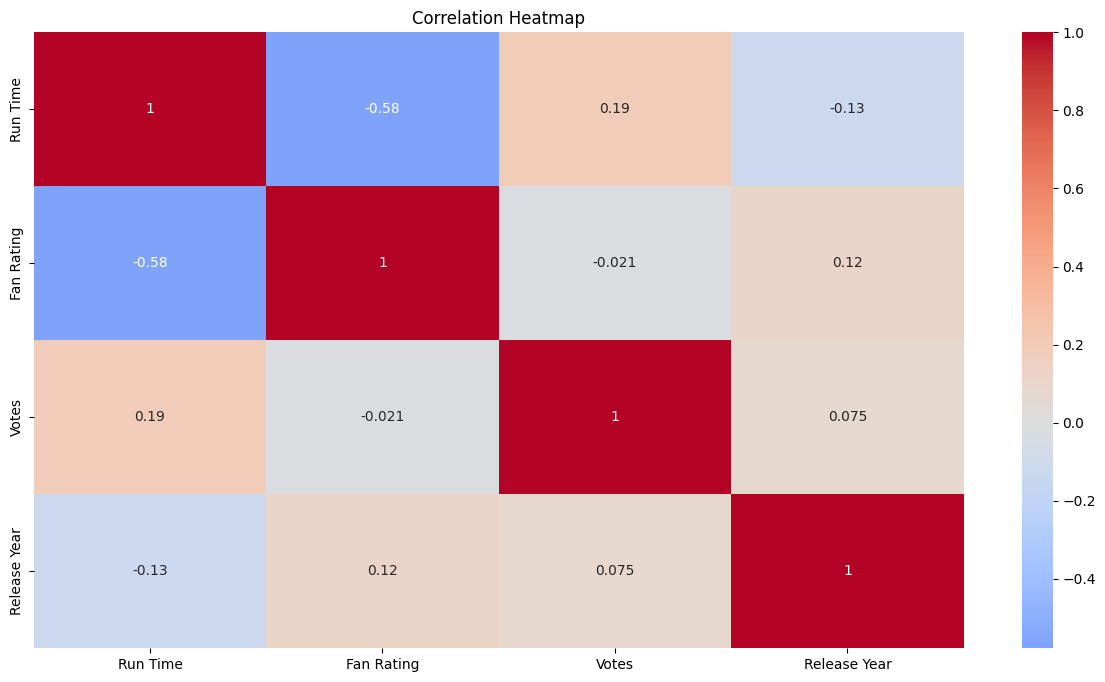

In [36]:
import seaborn as sns
# Select only numeric columns for correlation calculation
numeric_data = Netflix_df.select_dtypes(include=['number'])

plt.figure(figsize=(15, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

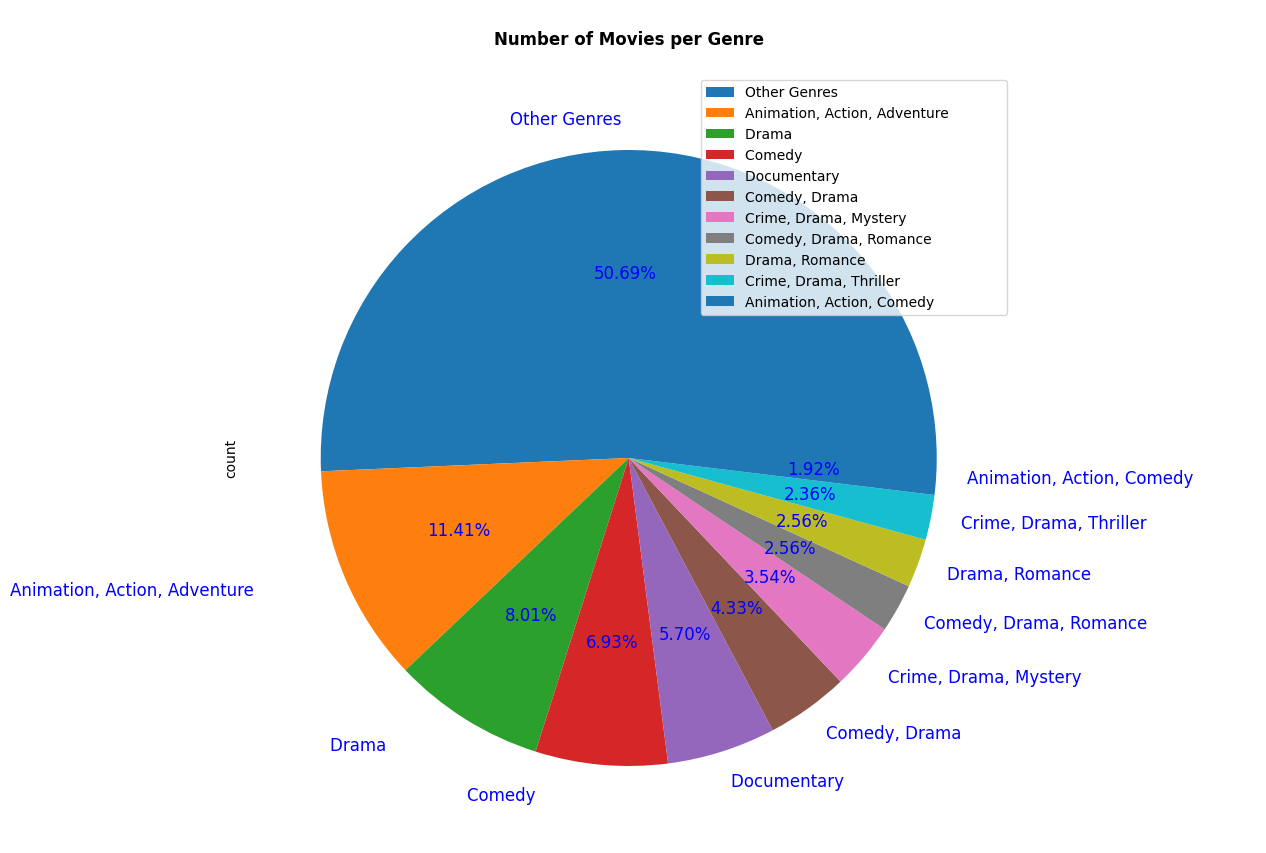

In [37]:
# Plotting the histogram of the "Fan Rating" attribute

# Get the top 10 used genres
top_genres = Netflix_df["Genre"].value_counts().nlargest(10)

# Replace the other genres with "others"
genre_counts = (
    Netflix_df["Genre"].apply(lambda x: x if x in top_genres else "Other Genres").value_counts()
)

# Plotting the pie chart
genre_counts.plot.pie(
    figsize=(10, 10),
    autopct="%.2f%%",
    fontsize=12,
    textprops={"color": "blue"},  # !! Changed the color to black
)

# Setting the plot title
plt.title("\nNumber of Movies per Genre\n", weight="bold")

# Adding genre names to the legend
plt.legend(labels=genre_counts.index)

plt.show()

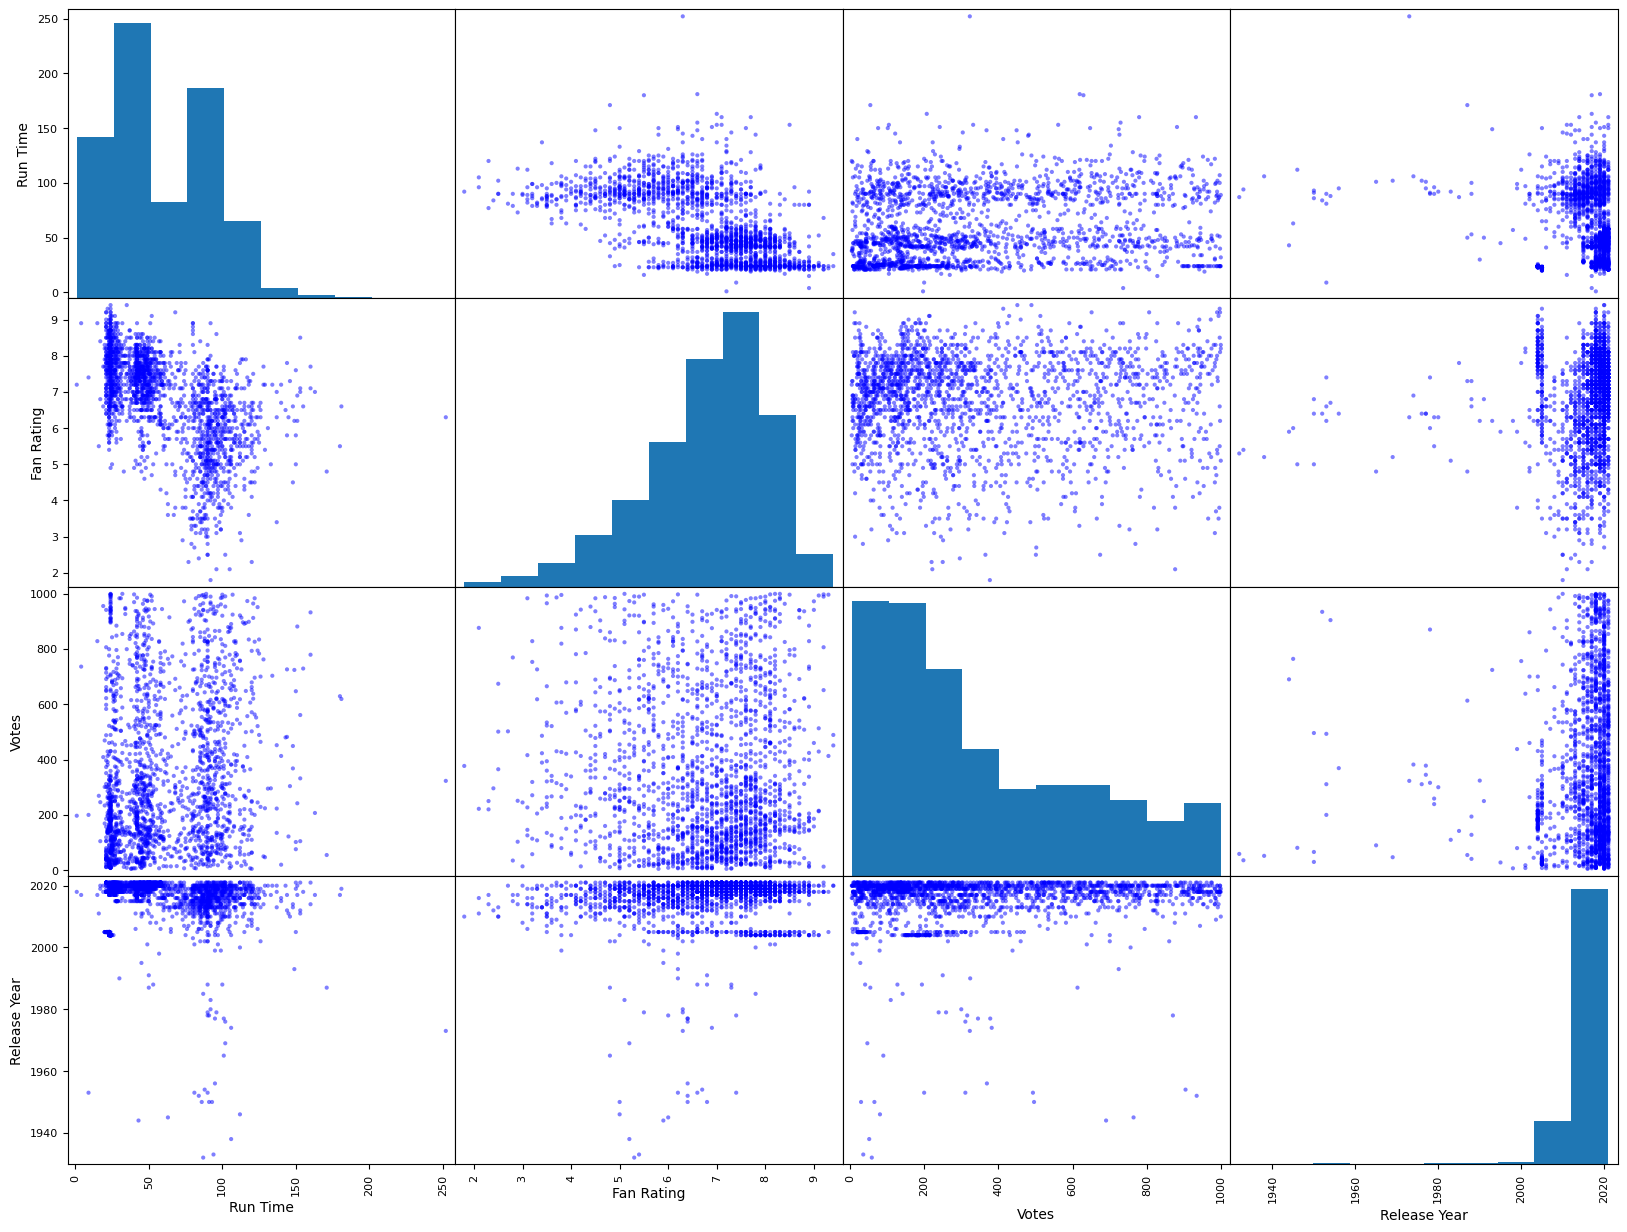

In [38]:
# Plotting the scatter matrix of the numerical values in the dataframe
pd.plotting.scatter_matrix(Netflix_df, figsize=(20, 15), color="blue")  
plt.show()

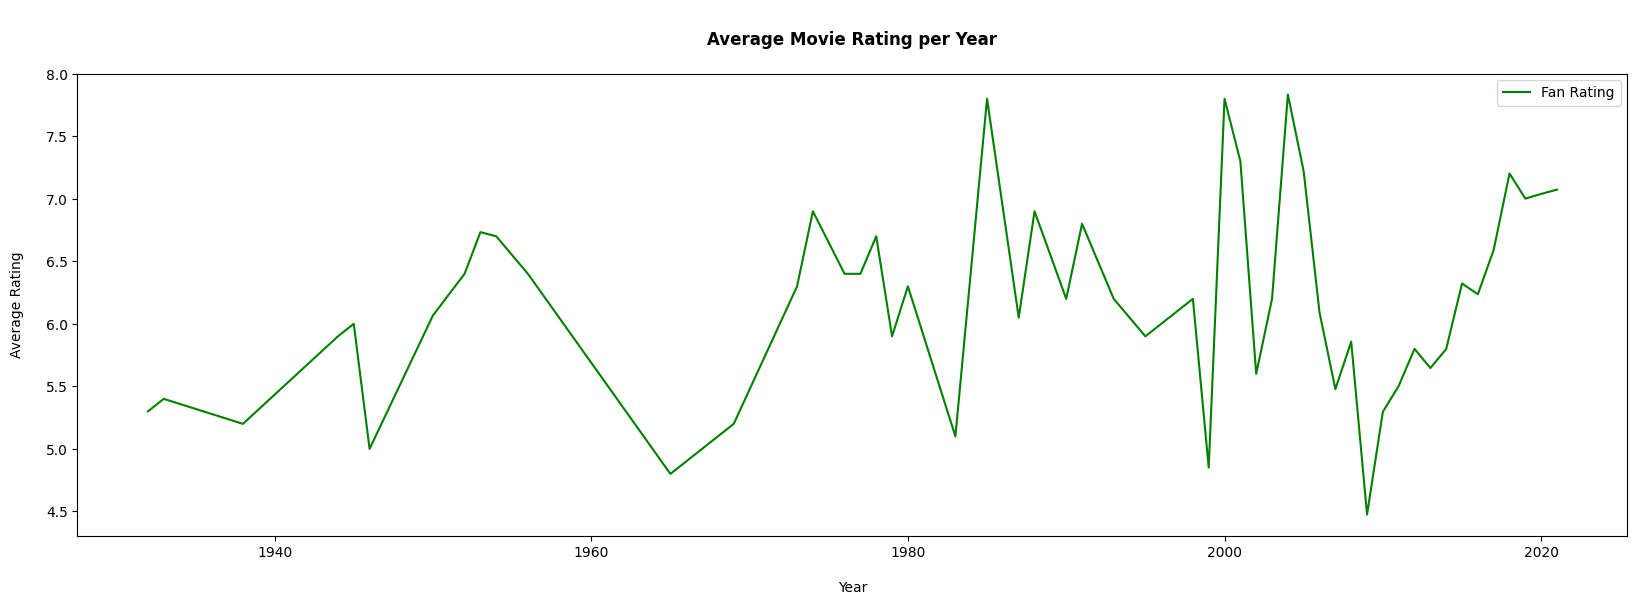

In [39]:
# Plotting the histogram of the "Fan Rating" attribute

# Plot a time series of the rating of the movies over the years
Netflix_df.groupby("Release Year")["Fan Rating"].mean().plot(figsize=(20, 6), color="green")

# Setting the plot title
plt.title("\nAverage Movie Rating per Year\n", weight="bold")

# Setting the x-axis label
plt.xlabel("\nYear")

# Setting the y-axis label
plt.ylabel("Average Rating\n")

plt.legend()
plt.show()